# Anomaly detection using Khiva
## Solving the Ventricular Premature Contraction Detection Problem

## Introduction

Premature ventricular contractions (PVCs) are a relatively common type of abnormal heartbeat (arrhythmia). The electrical events of the heart detected by the electrocardiogram (ECG) allow a PVC to be easily distinguished from a normal heart beat. Although a PVC can be a sign of decreased oxygenation to the heart muscle, often PVCs are benign and may even be found in healthy hearts.

## What causes PVCs?

There are certain things that can help to reinforce a premature signal in the ventricles. These include: advancing age, reduced blood flow to your heart (such as coronary artery disease), scarring after a heart attack, etc.

Many heart conditions raise the risk for PVCs including; high blood pressure, heart attack, heart failure, coronary heart disease, etc.

They often happen in people without any heart disease. However, PVCs are somewhat more common in people with some kind of heart disease.

This use case has been first published by the research team of Professor [Eamonn Keogh](https://www.cs.ucr.edu/~eamonn/).


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import khiva as kv

%config IPCompleter.greedy=True
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 5]

## Backend
Prints the backend being used. The CPU, CUDA and OPENCL backends are available in Khiva.  
  
> Note: if running in **hub.mybinder** consider it doesn't provide a GPU and its CPU is shared among other jupyter instances, so it may be slower than runing in your local machine.

In [ ]:
#kv.set_backend(kv.KHIVABackend.KHIVA_BACKEND_CPU)
print(kv.get_backend())

KHIVABackend.KHIVA_BACKEND_OPENCL


## Loading data.
Let's load an [ECG of a given patient (QT database (qtdb), sel102 patient)](https://physionet.org/cgi-bin/atm/ATM) containing 225,000 data points.

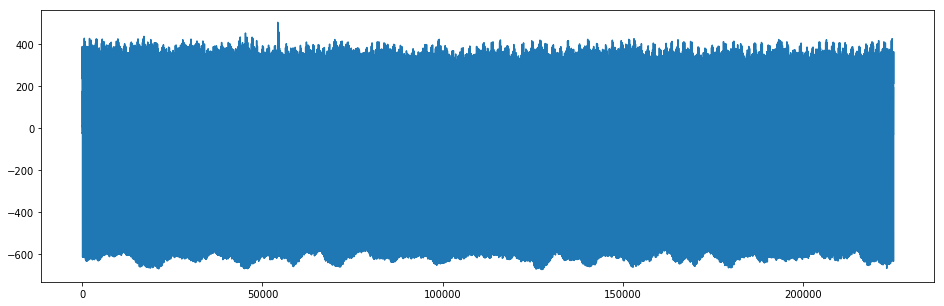

In [ ]:
mat = scipy.io.loadmat('./sel102m.mat')
plt.plot(range(len(mat['val'][1])), mat['val'][1])
plt.show()

## Can you spot a Premature Ventricular Contraction in the ECG contained above? We don't think so.
## Let's check if Khiva can help us finding it using the built-in [discord discovery functionality](http://khiva-python.readthedocs.io/en/latest/khiva.html#khiva.matrix.stomp_self_join)!

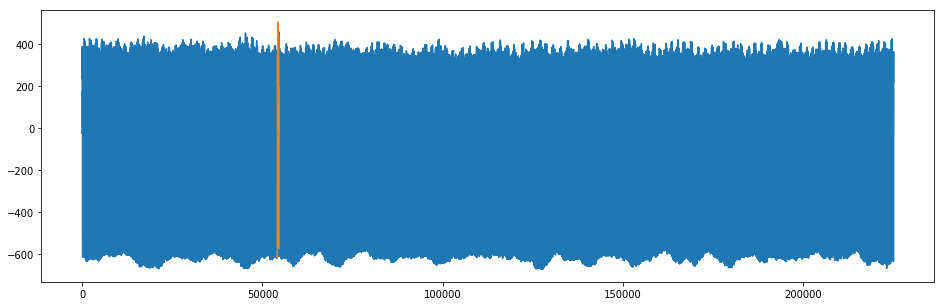

In [39]:
m = 400
lecg = len(mat['val'][1])
min = 50000
max = 60000

data = mat['val'][1]
data_reduced = data[min:max]
a = kv.Array(data_reduced)

profile, index = kv.stomp_self_join(a, m)
distance, index, subsequence = kv.find_best_n_discords(profile, index, m, 1)

# Plotting the whole dataset
plt.plot(range(len(data)), data)

# Plotting the discord
plt.plot(range(int(min + subsequence.to_numpy()[0]), int(min + subsequence.to_numpy()[0] + m)),
    data[int(min + subsequence.to_numpy()[0]):int(min + subsequence.to_numpy() + m)]
)

plt.show()

## It seems there is an issue in the orange segment, even though, we can not see it in the previous plot, let's zoom in!

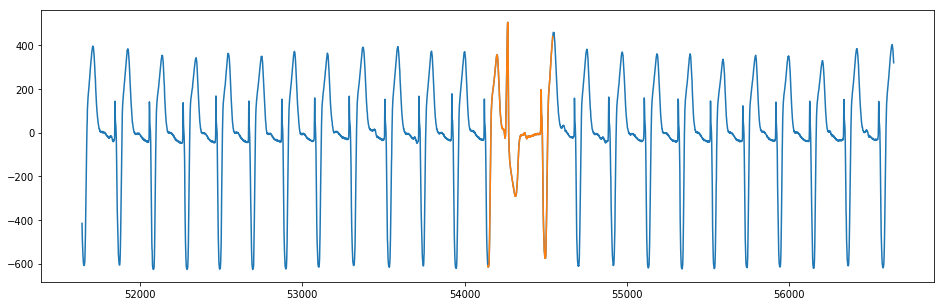

In [40]:
window = 2500

# Plot a data-window (blue line)
plt.plot(range(int(min + subsequence.to_numpy()[0] - window), int(min + subsequence.to_numpy()[0] + window)),
         data[int(min + subsequence.to_numpy()[0] - window):int(min + subsequence.to_numpy()[0] + window)]
         )

# Plot the discord (orange line)
plt.plot(range(int(min + subsequence.to_numpy()[0]), int(min + subsequence.to_numpy()[0] + m)),
         data[int(min + subsequence.to_numpy()[0]):int(min + subsequence.to_numpy()[0] + m)]
         )
plt.show()


# Premature Ventricular Contraction detected!

> Note: The problem is reduced to 10,000 datapoints for the sake of time.